In [1]:
!pip install tensorflow

In [2]:
import kagglehub
kagglehub.dataset_download('emmarex/plantdisease')

Using Colab cache for faster access to the 'plantdisease' dataset.


'/kaggle/input/plantdisease'

In [3]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
train=image_dataset_from_directory("/kaggle/input/plantdisease/PlantVillage",batch_size = 32, image_size=(150,150),seed=123)

validation=image_dataset_from_directory("/kaggle/input/plantdisease/plantvillage/PlantVillage",batch_size = 32, image_size=(150,150),seed=123)
num_classes = len(train.class_names)

Found 20638 files belonging to 15 classes.
Found 20638 files belonging to 15 classes.


In [4]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train.map(lambda x, y: (normalization_layer(x), tf.one_hot(y, depth=num_classes)))
val_ds = validation.map(lambda x, y: (normalization_layer(x), tf.one_hot(y, depth=num_classes)))

In [5]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dense(15,activation = "softmax"))
model.compile(optimizer = "adam",loss="categorical_crossentropy",metrics = ["accuracy"])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     2,654,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           495 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,674,127 (10.20 MB)

 Trainable params: 2,674,127 (10.20 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.fit(train_ds,validation_data=val_ds,batch_size=64,epochs=10)

Epoch 1/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 117s 175ms/step - accuracy: 0.4869 - loss: 1.6723 - val_accuracy: 0.8488 - val_loss: 0.4806
Epoch 2/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.8382 - loss: 0.5011 - val_accuracy: 0.8985 - val_loss: 0.2959
Epoch 3/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 39s 61ms/step - accuracy: 0.9003 - loss: 0.3041 - val_accuracy: 0.9612 - val_loss: 0.1238
Epoch 4/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 39s 60ms/step - accuracy: 0.9432 - loss: 0.1720 - val_accuracy: 0.9576 - val_loss: 0.1207
Epoch 5/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.9558 - loss: 0.1301 - val_accuracy: 0.9783 - val_loss: 0.0682
Epoch 6/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 39s 60ms/step - accuracy: 0.9710 - loss: 0.0865 - val_accuracy: 0.9889 - val_loss: 0.0372
Epoch 7/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 39s 61ms/step - accuracy: 0.9748 - loss: 0.0774 - val_accuracy: 0.9699 - val_loss: 0.0829
Epoch 8/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 39s 60ms/step - accuracy: 0.9749 - loss: 0.0753 

In [7]:
model.history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

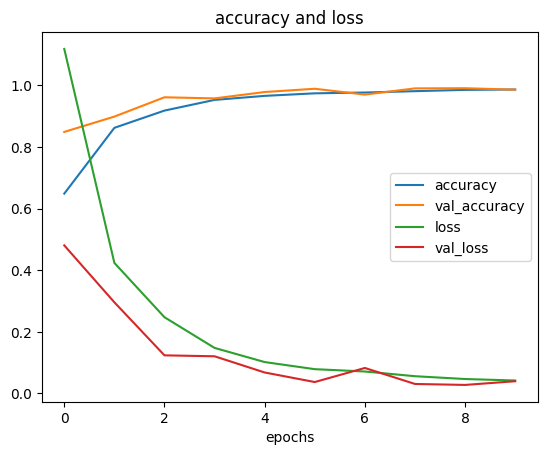

In [8]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.xlabel("epochs")
plt.legend(["accuracy","val_accuracy","loss","val_loss"])
plt.title("accuracy and loss")
plt.show()

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     2,654,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           495 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,022,383 (30.60 MB)

 Trainable params: 2,674,127 (10.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,348,256 (20.40 MB)

In [13]:
from google.colab import drive
drive.mount('/content/drive')

model_save_path = '/content/drive/My Drive/plant_disease_model.keras'
model.save(model_save_path)
print(f"Model saved to: {model_save_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to: /content/drive/My Drive/plant_disease_model.keras
